# Walmart Analysis
Walmart is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores.

## Importing packages and creating dataframes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv('/content/train_walmart.csv')
features=pd.read_csv('/content/features.csv')
stores=pd.read_csv('/content/stores.csv')

FileNotFoundError: ignored

### Lets see the dataframes

In [ ]:
train

In [ ]:
features

In [ ]:
stores

## Check for null values

In [ ]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
features.isnull().sum()


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

There are many nulls in features. We will see the percentage of the nulls in the columns.

In [ ]:
features.isnull().sum()/len(features)*100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

Percentage of null values in CPI and Unemployment is small, but for MarkDown 1 to 5 it is large (more the 50%)

### Inner join of the data

In [ ]:
df1=features.merge(stores,how='inner',on='Store')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Join trainnin data with df1
We shall join based on two columns - stores and date. To get correct output (avoid unambiguity) we shall convert the column data into datetime datatype.

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'])

In [ ]:
train['Date']=pd.to_datetime(train['Date'])

In [ ]:
df=train.merge(df1, how='inner',on =['Store','Date','IsHoliday'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
df.isnull().sum()/len(df)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

## Separate week and year for the date

In [ ]:
df['Week']=df.Date.dt.isocalendar().week

In [ ]:
df['Year']=df.Date.dt.isocalendar().year

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


# EDA

In [ ]:
def makeScatter(df,feature):
  plt.figure(figsize=(16,12))
  sns.scatterplot(data=df,x=feature,y='Weekly_Sales')
  plt.title("Weekly Sales vs "+feature)
  plt.xlabel(feature)
  plt.ylabel("Weekly Sales")
  #plt.xticks(rotation=45)
  plt.show()

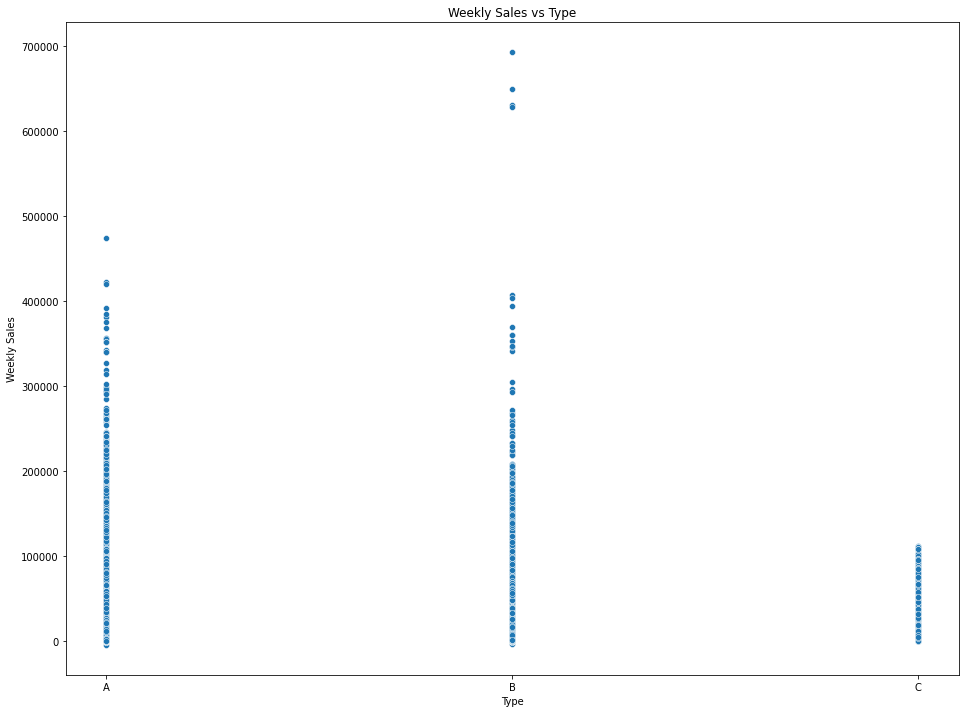

In [ ]:
makeScatter(df,'Type')

Type B store have higher outliers. Store type A and type B are performing similar.

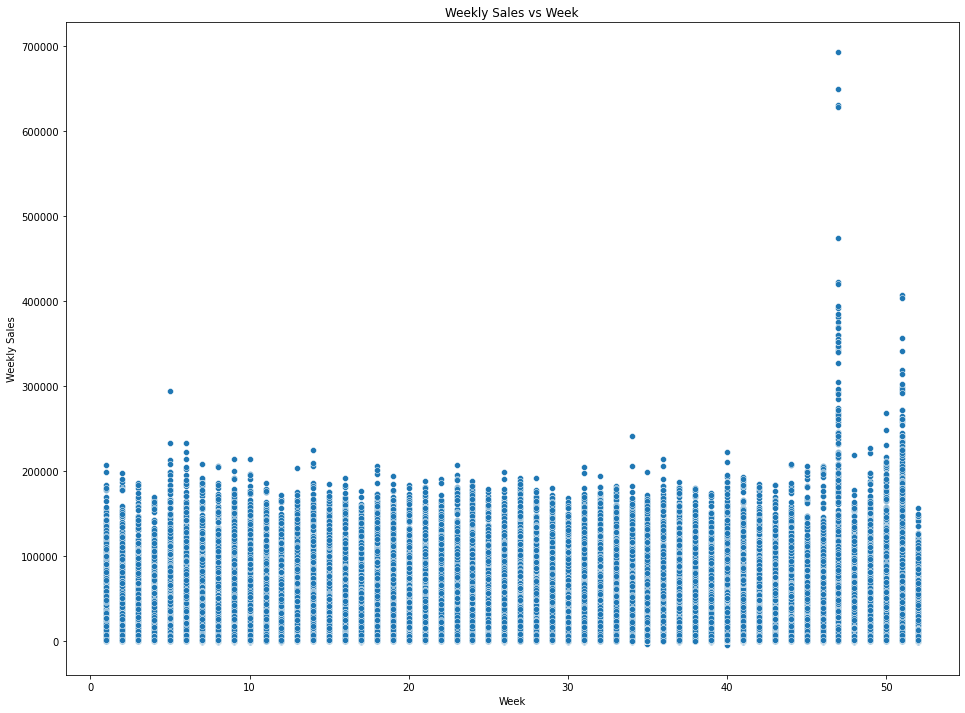

In [ ]:
makeScatter(df,'Week')

There are more sales after week 48. We can see during holiday season sales are vary high.

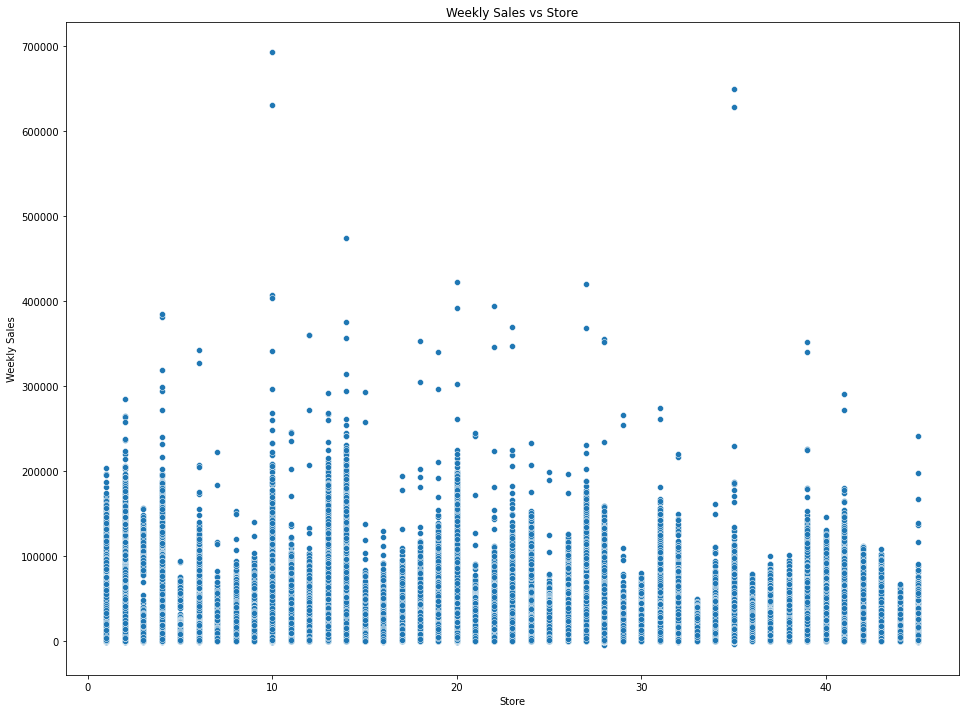

In [ ]:
makeScatter(df,'Store')

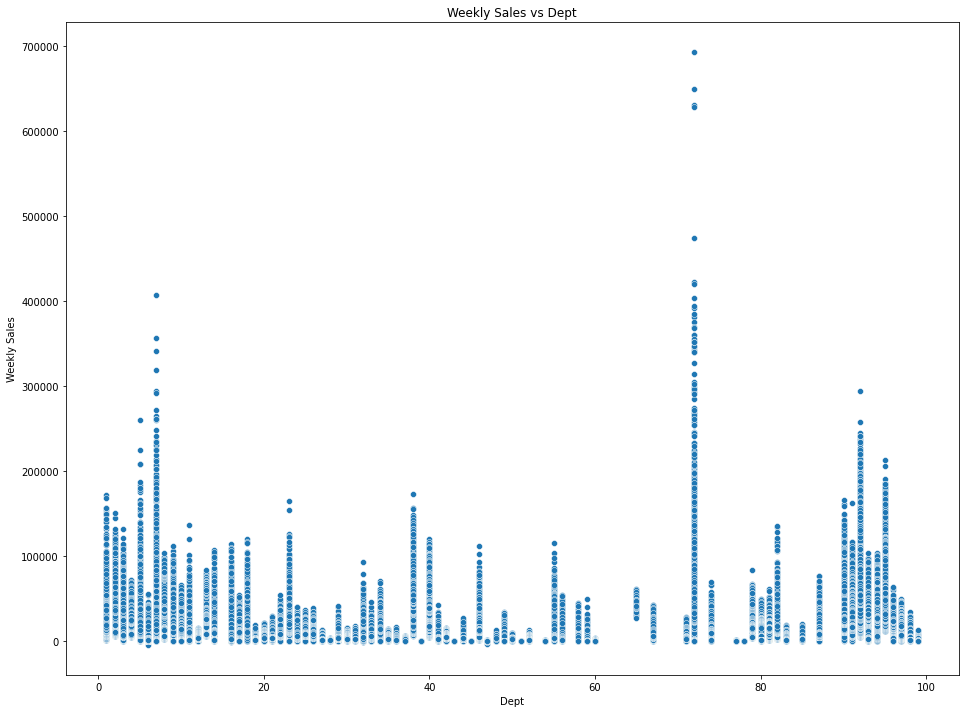

In [ ]:
makeScatter(df,'Dept')

There is a Department between 60 and 80 which has performed very well compared to departments.

In [ ]:
dept_weeklySales=df.groupby('Dept').agg({'Weekly_Sales':['sum','mean']})

In [ ]:
dept_weeklySales.columns=['Sum','Mean']

In [ ]:
dept_weeklySales.reset_index()

,Dept,Sum,Mean
0,1,1.236388e+08,19213.485088
1,2,2.806112e+08,43607.020113
2,3,7.589245e+07,11793.698516
3,4,1.671467e+08,25974.630238
4,5,1.356074e+08,21365.583515
...,...,...,...
76,95,4.493202e+08,69824.423080
77,96,7.383392e+07,15210.942761
78,97,8.949651e+07,14255.576919
79,98,3.982892e+07,6824.694889


In [ ]:
dept_weeklySales.sort_values(by='Mean',ascending=False)

,Sum,Mean
Dept,,
92,4.839433e+08,75204.870531
95,4.493202e+08,69824.423080
38,3.931181e+08,61090.619568
72,3.057252e+08,50566.515417
65,6.498164e+06,45441.706224
...,...,...
51,3.057283e+04,21.931729
39,1.779800e+02,11.123750
78,1.714710e+03,7.296638


On the graph store 72 was looking better but in actual store 92,95 and 38 are performing better.

In [ ]:
def yearlyline(df,year):
  data=df[df["Year"]==year].groupby('Week').agg({'Weekly_Sales':'mean'})
  data.columns=['Weekly_sales_mean']
  data.reset_index(inplace=True)
  plt.figure(figsize=(16,12))
  sns.lineplot(data['Week'],data['Weekly_sales_mean'])
  plt.title('Weekly sales for '+str(year))
  plt.show()

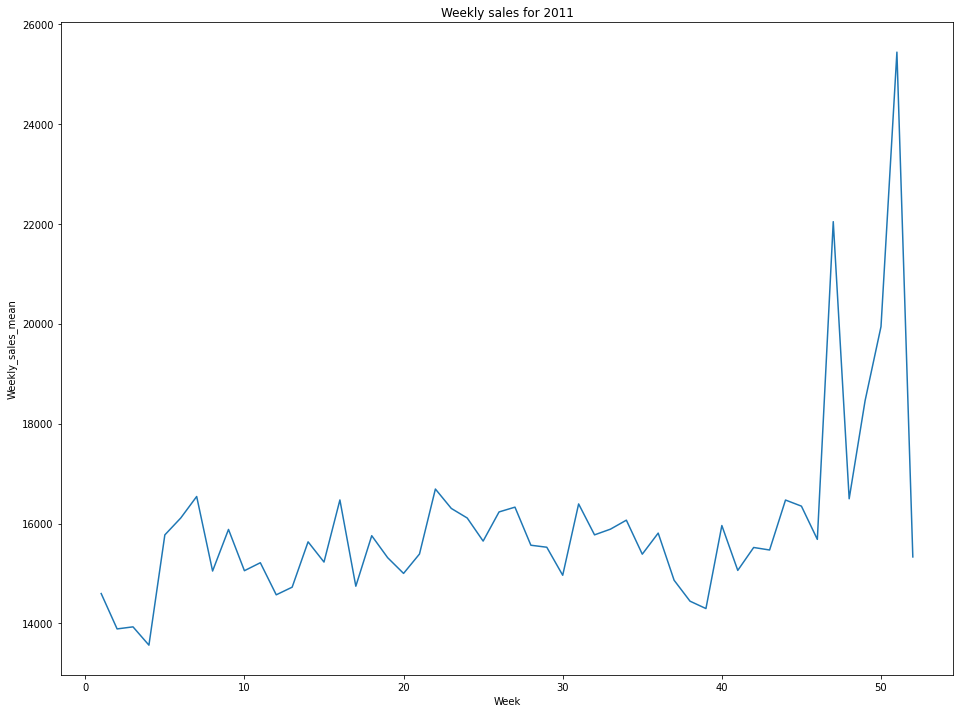

In [ ]:
yearlyline(df,2011)

We can see there are unusually high sales ar the end of year. We shall see the graphs for other years also.

In [ ]:
df['Year'].unique()

<IntegerArray>
[2010, 2011, 2012]
Length: 3, dtype: UInt32

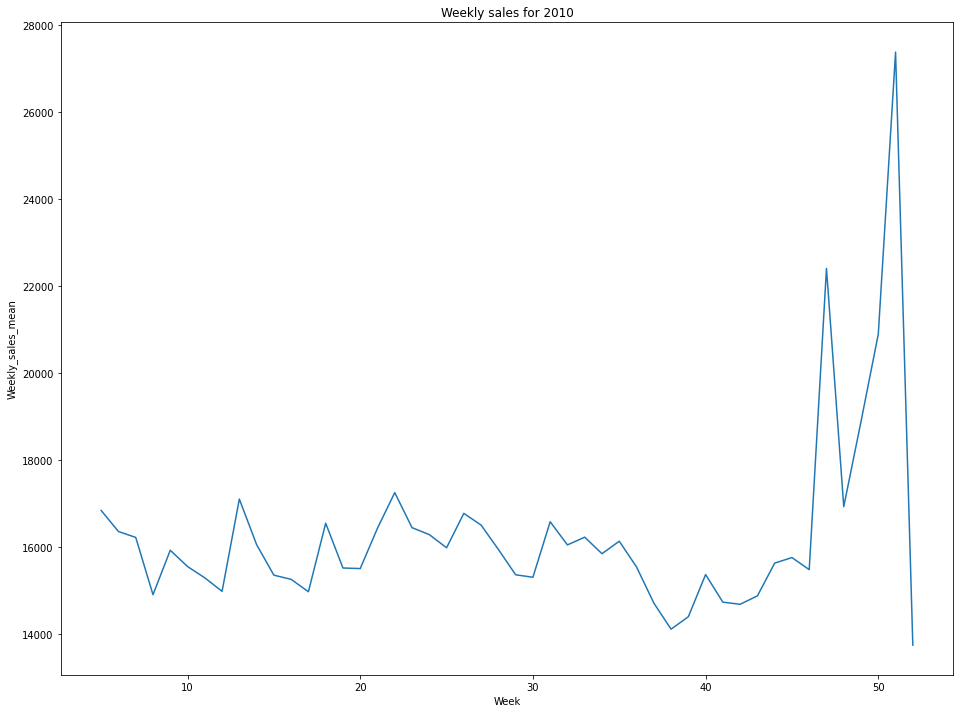

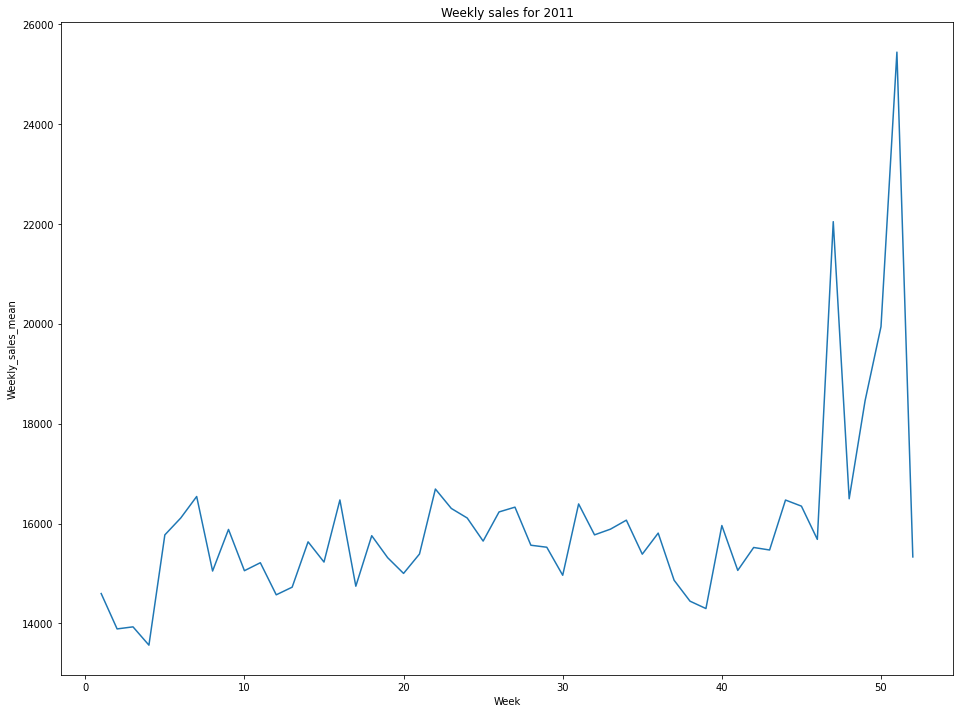

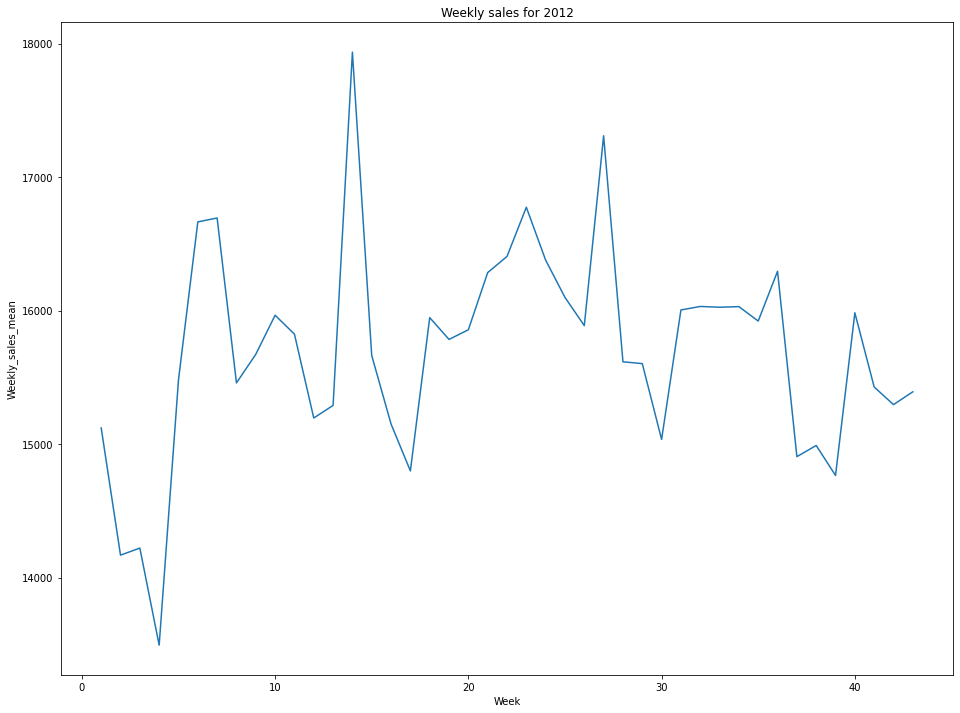

In [ ]:
yearlyline(df,2010)
yearlyline(df,2011)
yearlyline(df,2012)


Year 2010 and 2011 have high sales at the end of year, but the pattern is slightly changed in year 2012. But there is no data for year end of 2012.


## We will plot these graphs on single plot. This will help to understand the data well.

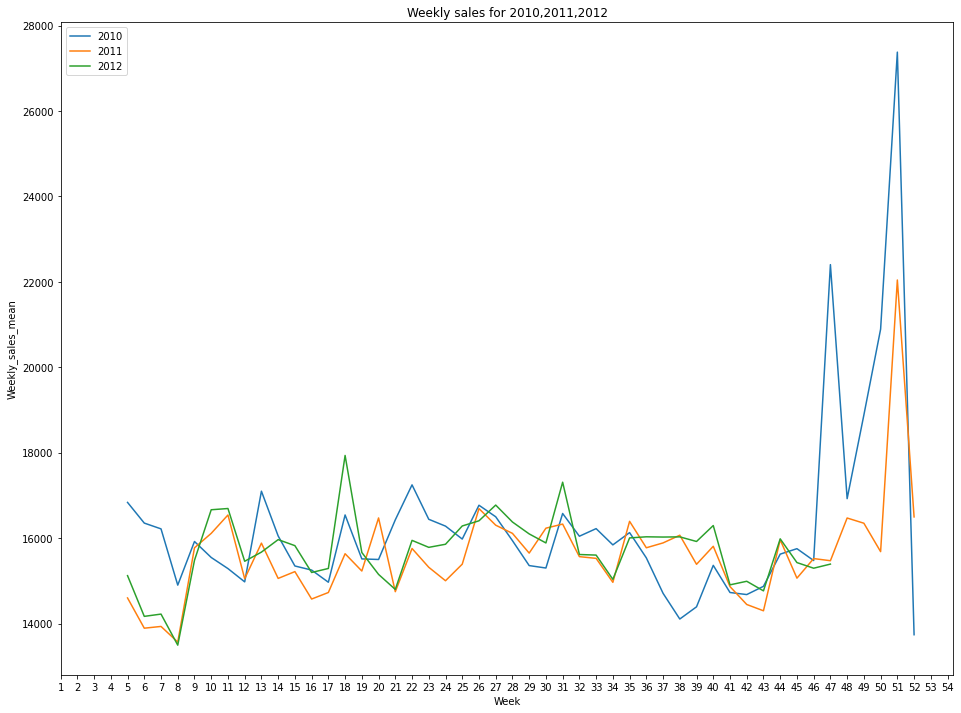

In [ ]:
data10=df[df["Year"]==2010].groupby('Week').agg({'Weekly_Sales':'mean'})
data10.columns=['Weekly_sales_mean']
data10.reset_index(inplace=True)

data11=df[df["Year"]==2011].groupby('Week').agg({'Weekly_Sales':'mean'})
data11.columns=['Weekly_sales_mean']
data11.reset_index(inplace=True)

data12=df[df["Year"]==2012].groupby('Week').agg({'Weekly_Sales':'mean'})
data12.columns=['Weekly_sales_mean']
data12.reset_index(inplace=True)

plt.figure(figsize=(16,12))
sns.lineplot(data10['Week'],data10['Weekly_sales_mean'])
sns.lineplot(data10['Week'],data11['Weekly_sales_mean'])
sns.lineplot(data10['Week'],data12['Weekly_sales_mean'])

plt.title('Weekly sales for 2010,2011,2012')
plt.xticks(np.arange(1,55,1))
plt.legend(['2010','2011','2012'])
plt.show()

Now we can see the pattern is being followed i.e. at the end of year the sales are high.

In [ ]:
data=df.groupby(['Year','Week']).agg({'Weekly_Sales':'mean'})
data.columns=['Weekly_sales_mean']
data.reset_index(inplace=True)

## Data distribution of weekly sales

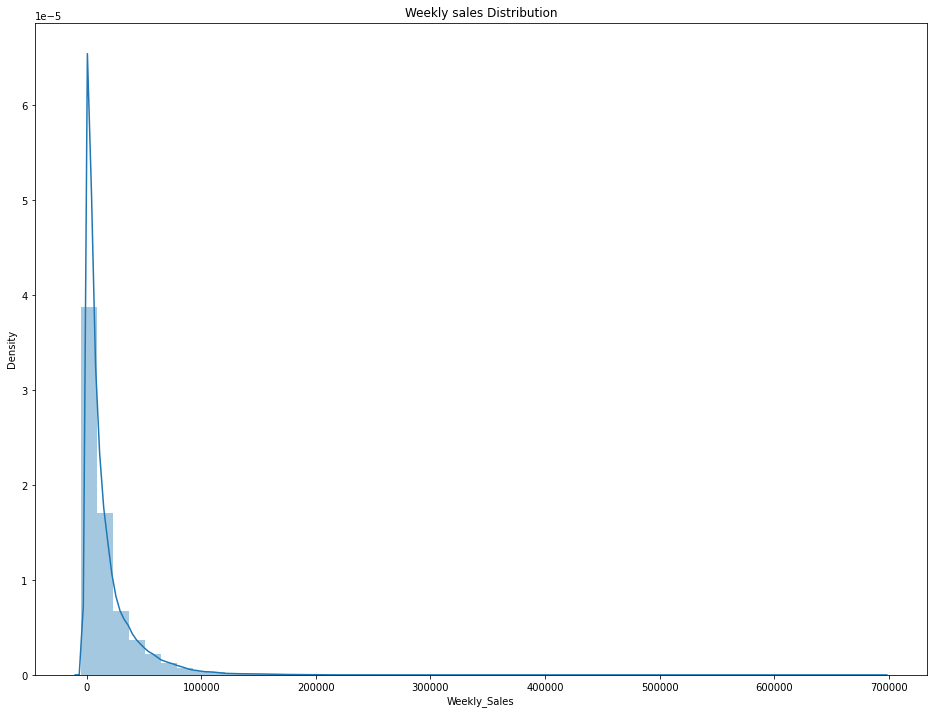

In [ ]:
plt.figure(figsize=(16,12))
sns.distplot(df['Weekly_Sales'])

plt.title('Weekly sales Distribution')
plt.show()

Most of the sales are not more than 100000. The data is positively skewed.

## Boxplot of weekly sales over various features

In [ ]:
def box(df,feature):
  plt.figure(figsize=(16,12))
  sns.boxplot(x=feature,y='Weekly_Sales',data=df)
  plt.title("Box plot over " + str(feature))
  plt.show()

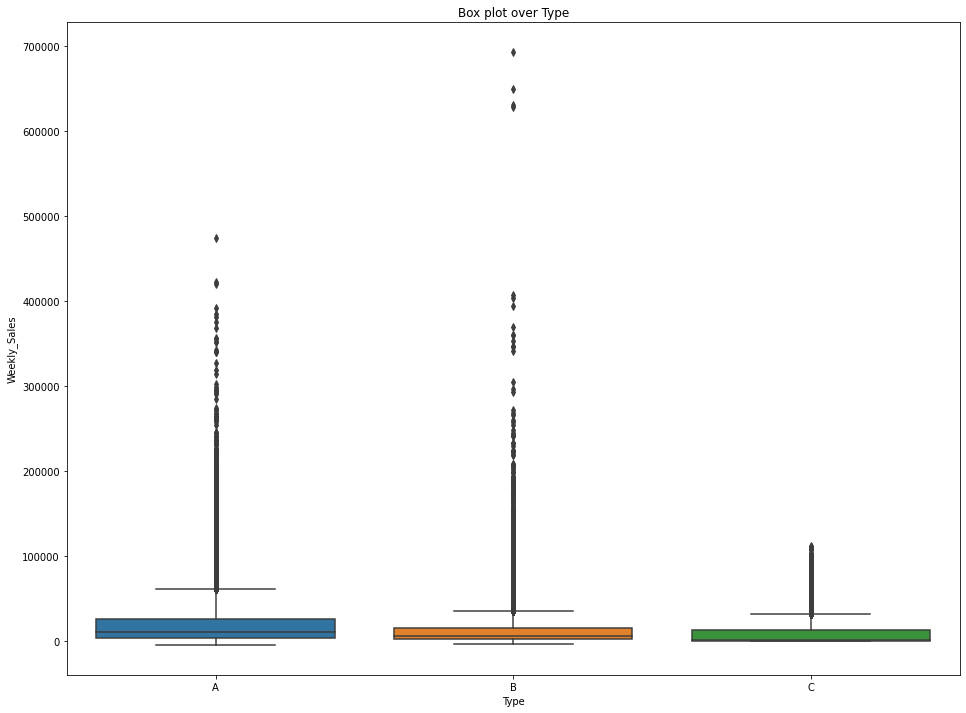

In [ ]:
box(df,'Type')

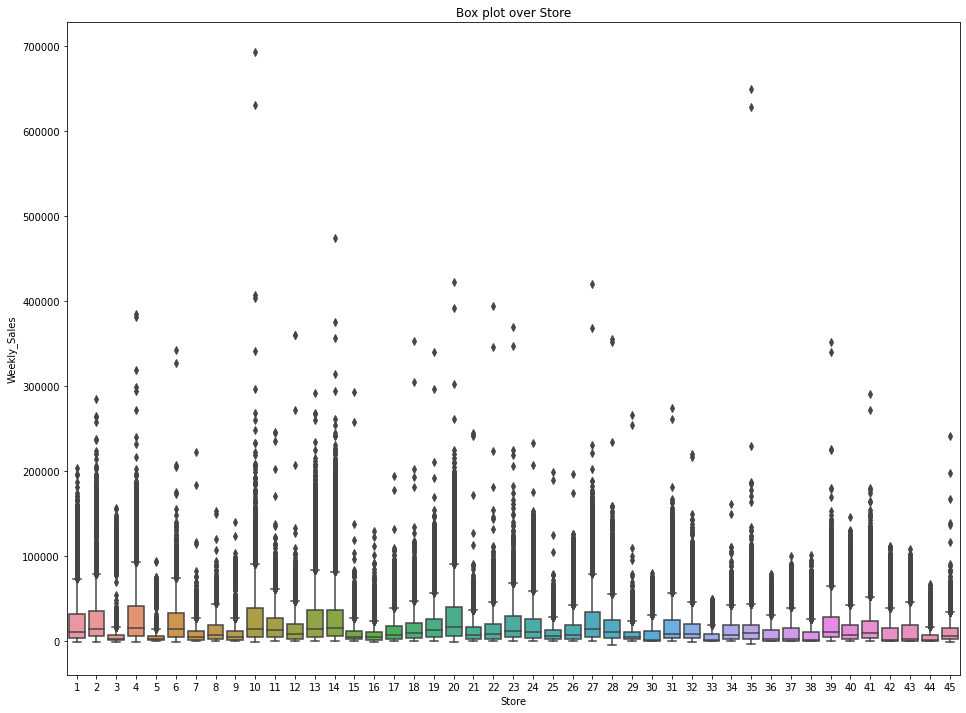

In [ ]:
box(df,'Store')

## Highest average overall sales in Stores

In [ ]:
avgSales=df.groupby('Store').agg({'Weekly_Sales':['sum','mean','max']})

In [ ]:
avgSales.columns=['Sum','Mean','Max']

In [ ]:
avgSales.reset_index(inplace=True)

In [ ]:
avgSales

,Store,Sum,Mean,Max
0,1,2.224028e+08,21710.543621,203670.47
1,2,2.753824e+08,26898.070031,285353.53
2,3,5.758674e+07,6373.033983,155897.94
3,4,2.995440e+08,29161.210415,385051.04
4,5,4.547569e+07,5053.415813,93517.72
5,6,2.237561e+08,21913.243624,342578.65
6,7,8.159828e+07,8358.766148,222921.09
7,8,1.299512e+08,13133.014768,153431.69
8,9,7.778922e+07,8772.890379,139427.43
9,10,2.716177e+08,26332.303819,693099.36


In [ ]:
avgSales.sort_values(by='Mean',ascending=False,inplace=True)

In [ ]:
avgSales.head(10)

,Store,Sum,Mean,Max
19,20,3.013978e+08,29508.301592,422306.25
3,4,2.995440e+08,29161.210415,385051.04
13,14,2.889999e+08,28784.851727,474330.10
12,13,2.865177e+08,27355.136891,292165.78
1,2,2.753824e+08,26898.070031,285353.53
9,10,2.716177e+08,26332.303819,693099.36
26,27,2.538559e+08,24826.984536,420586.57
5,6,2.237561e+08,21913.243624,342578.65
0,1,2.224028e+08,21710.543621,203670.47
38,39,2.074455e+08,21000.763562,351553.98


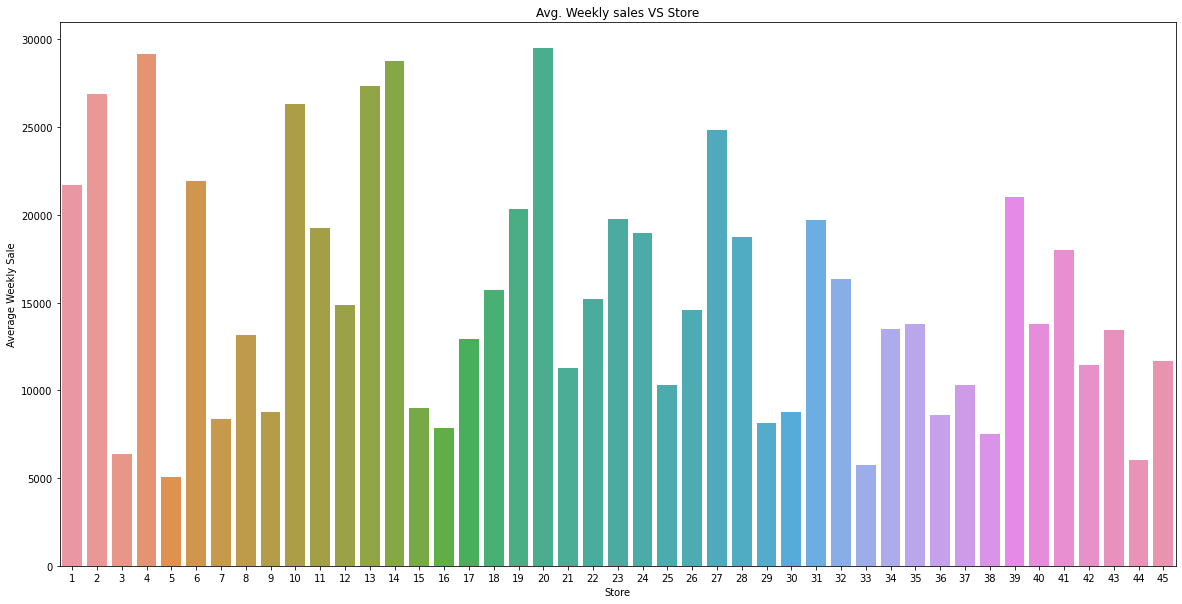

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Store',y='Mean',data=avgSales)
plt.title("Avg. Weekly sales VS Store")
plt.ylabel('Average Weekly Sale')
plt.show()


## Weekly Sales vs Department

In [ ]:
deptSales=df.groupby('Dept')['Weekly_Sales'].mean()

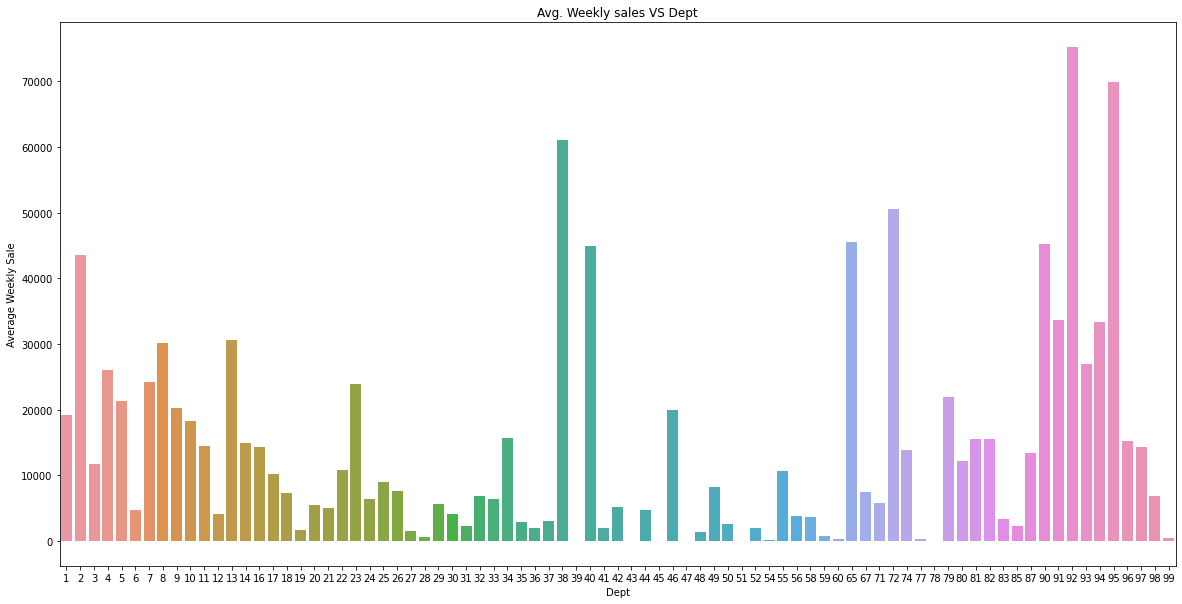

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=deptSales.index,y=deptSales.values)
plt.title("Avg. Weekly sales VS Dept")
plt.ylabel('Average Weekly Sale')
plt.show()

In [ ]:
deptSales.sort_values(ascending=False,inplace=True)

In [ ]:
deptSales

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64

Department 47 has negative sales so we can say that there is more return in the department than the sales.

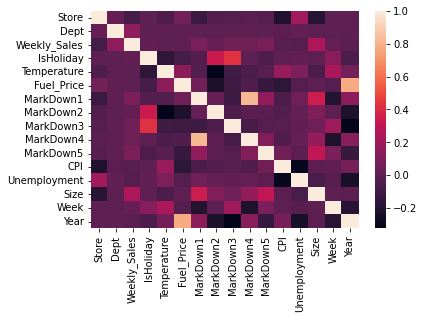

In [ ]:
sns.heatmap(df.corr())

## Lets make readable heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

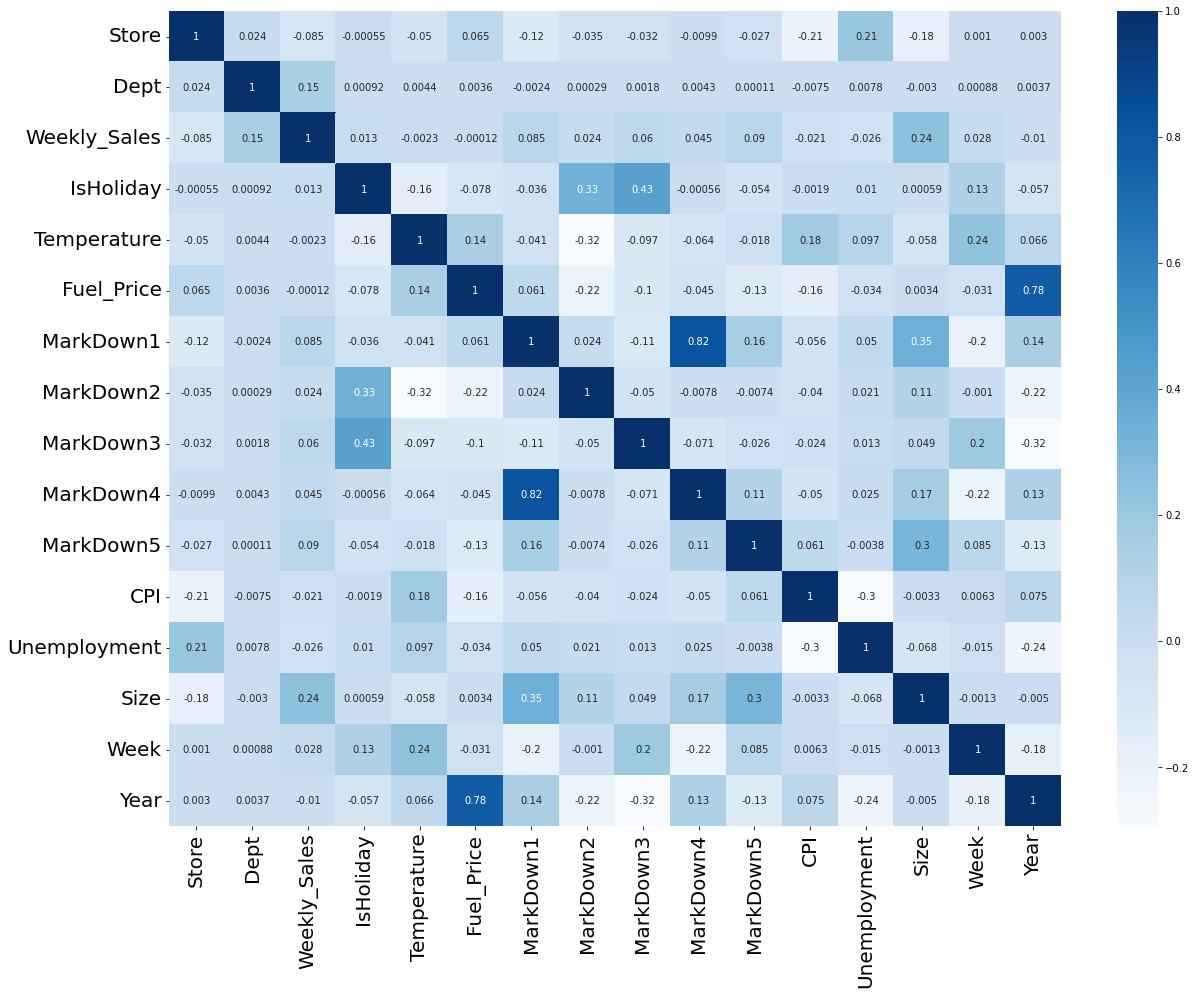

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),robust=True,annot=True,cmap='Blues')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(rotation=90)

Darker the colour higher is the correlation between the features.
1) MarkDown1 and MarkDown4
2) Fuel Price and Year  
These have higher correlation.

## Yearwise weekly fuel price

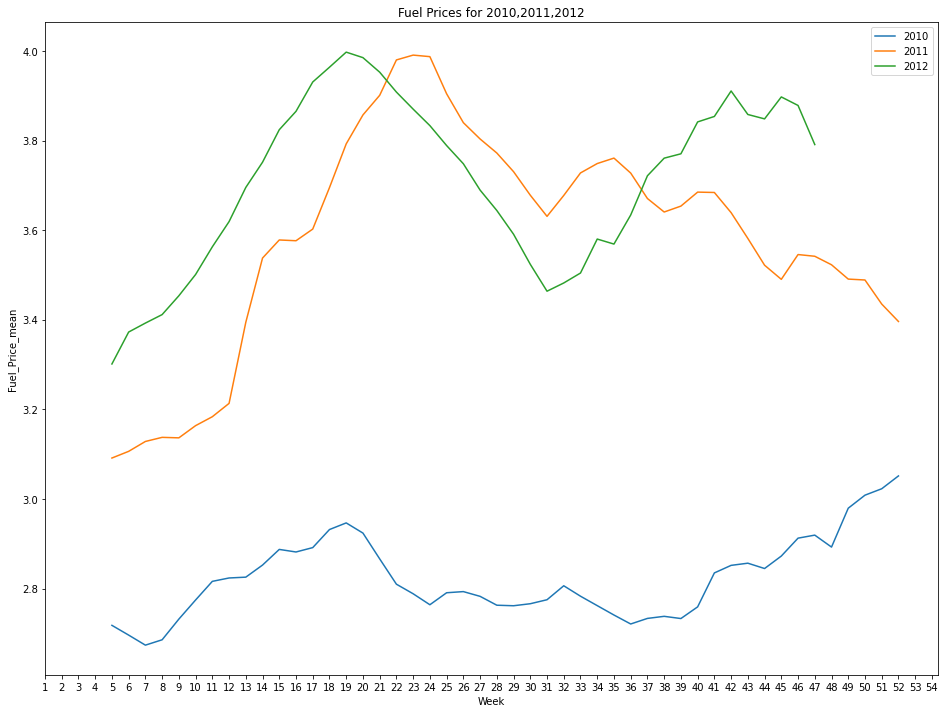

In [ ]:
data10=df[df["Year"]==2010].groupby('Week').agg({'Fuel_Price':'mean'})
data10.columns=['Fuel_Price_mean']
data10.reset_index(inplace=True)

data11=df[df["Year"]==2011].groupby('Week').agg({'Fuel_Price':'mean'})
data11.columns=['Fuel_Price_mean']
data11.reset_index(inplace=True)

data12=df[df["Year"]==2012].groupby('Week').agg({'Fuel_Price':'mean'})
data12.columns=['Fuel_Price_mean']
data12.reset_index(inplace=True)

plt.figure(figsize=(16,12))
sns.lineplot(data10['Week'],data10['Fuel_Price_mean'])
sns.lineplot(data10['Week'],data11['Fuel_Price_mean'])
sns.lineplot(data10['Week'],data12['Fuel_Price_mean'])

plt.title('Fuel Prices for 2010,2011,2012')
plt.xticks(np.arange(1,55,1))
plt.legend(['2010','2011','2012'])
plt.show()

There is huge hike for the price of the fuel from 2010 to 2011. But there is not much relation between week and fuel price

## Plot of size vs sales

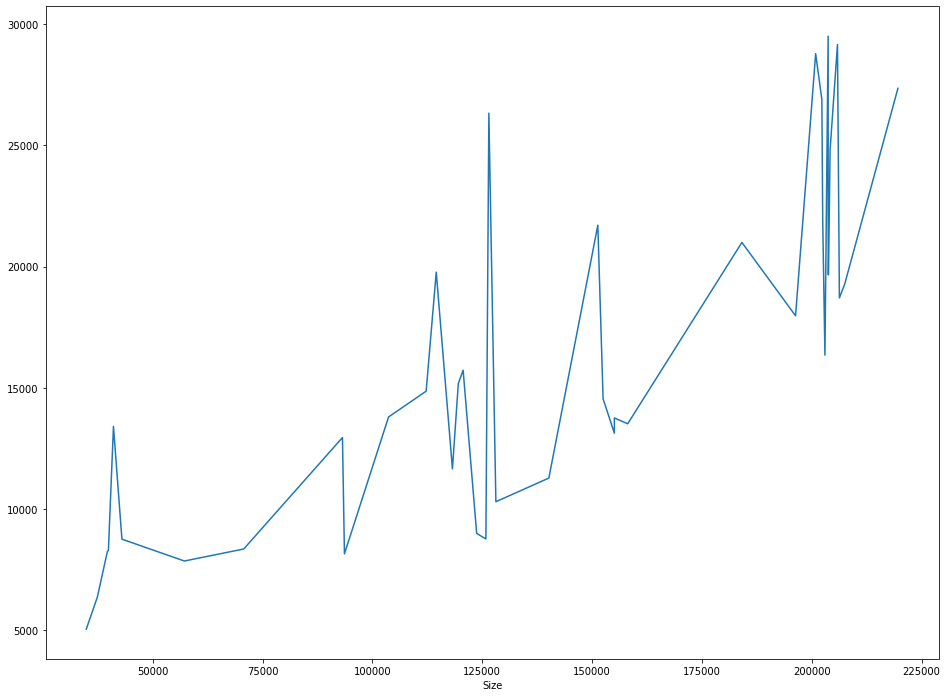

In [ ]:
sizeSales=df.groupby('Size')['Weekly_Sales'].mean()

plt.figure(figsize=(16,12))

sns.lineplot(x=sizeSales.index,y=sizeSales.values)

There is some relation between sales and size of the stores.

### Type of stores

In [ ]:
highSales=df.groupby(['Type','Store']).agg({'Weekly_Sales':['mean','sum']})

In [ ]:
highSales

Weekly_Sales              
                    mean           sum
Type Store                            
A    1      21710.543621  2.224028e+08
     2      26898.070031  2.753824e+08
     4      29161.210415  2.995440e+08
     6      21913.243624  2.237561e+08
     8      13133.014768  1.299512e+08
     11     19276.762751  1.939628e+08
     13     27355.136891  2.865177e+08
     14     28784.851727  2.889999e+08
     19     20362.126734  2.066349e+08
     20     29508.301592  3.013978e+08
     24     18969.106500  1.940160e+08
     26     14554.129672  1.434164e+08
     27     24826.984536  2.538559e+08
     28     18714.889803  1.892637e+08
     31     19681.907464  1.996139e+08
     32     16351.621855  1.668192e+08
     33      5728.414053  3.716022e+07
     34     13522.081671  1.382498e+08
     36      8584.412563  5.341221e+07
     39     21000.763562  2.074455e+08
     40     13763.632803  1.378703e+08
     41     17976.004648  1.813419e+08
B    3       6373.033983  5.758674e+07
     5       5053.415813  4.547569e+07
     7       8358.766148  8.159828e+07
     9       8772.890379  7.778922e+07
     10     26332.303819  2.716177e+08
     12     14867.308619  1.442872e+08
     15      9002.493073  8.913368e+07
     16      7863.224124  7.425243e+07
     17     12954.393636  1.277821e+08
     18     15733.313136  1.551147e+08
     21     11283.435496  1.081179e+08
     22     15181.218886  1.470756e+08
     23     19776.180881  1.987506e+08
     25     10308.157810  1.010612e+08
     29      8158.810609  7.714155e+07
     35     13803.596986  1.315207e+08
     45     11662.897315  1.123953e+08
C    30      8764.237719  6.271689e+07
     37     10297.355026  7.420274e+07
     38      7492.478460  5.515963e+07
     42     11443.370118  7.956575e+07
     43     13415.114118  9.056544e+07
     44      6038.929814  4.329309e+07

In [ ]:
highSales.columns=['Mean','Sum']

In [ ]:
highSales.reset_index(inplace=True)

In [ ]:
highSales.sort_values(by='Mean',inplace=True,ascending=False)

In [ ]:
highSales

,Type,Store,Mean,Sum
9,A,20,29508.301592,3.013978e+08
2,A,4,29161.210415,2.995440e+08
7,A,14,28784.851727,2.889999e+08
6,A,13,27355.136891,2.865177e+08
1,A,2,26898.070031,2.753824e+08
26,B,10,26332.303819,2.716177e+08
12,A,27,24826.984536,2.538559e+08
3,A,6,21913.243624,2.237561e+08
0,A,1,21710.543621,2.224028e+08
19,A,39,21000.763562,2.074455e+08


Note that Store type A have highest sales among stores. So we can say the store with larger size have greater sales.